In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:/Users/HP/Downloads/train_ctrUa4K.csv")

In [3]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.size

7982

In [6]:
data.shape

(614, 13)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

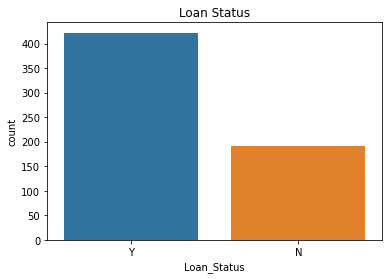

In [8]:
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status')
plt.show()

Text(0.5, 1.0, 'Education and Employment')

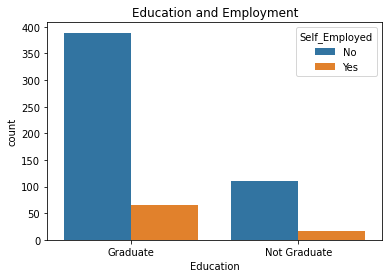

In [9]:
sns.countplot(x='Education', hue='Self_Employed', data=data)
plt.title('Education and Employment')

In [10]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Replacing Missing Values

In [12]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [13]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [14]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [15]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [16]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [17]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)

In [18]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [19]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [22]:
column=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area','Loan_Status']

In [23]:
for i in column:
    data[i]=encoder.fit_transform(data[i])

In [24]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


In [25]:
X=data.drop(['Loan_ID','Loan_Status'],axis=1)

In [26]:
y=data['Loan_Status']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
##KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [30]:
knn_pred = knn.predict(x_test)
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [31]:
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN ACCURCY:", knn_accuracy)

KNN ACCURCY: 0.5772357723577236


In [32]:
from sklearn.metrics import classification_report
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.09      0.24      0.13        17
           1       0.84      0.63      0.72       106

    accuracy                           0.58       123
   macro avg       0.47      0.43      0.43       123
weighted avg       0.73      0.58      0.64       123



In [33]:
#SVM
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train, y_train)

SVC()

In [34]:
svc_pred = svc.predict(x_test)

In [35]:
svc_accuracy = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_accuracy)

SVM Accuracy: 0.6504065040650406


In [36]:
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.65      0.79       123

    accuracy                           0.65       123
   macro avg       0.50      0.33      0.39       123
weighted avg       1.00      0.65      0.79       123



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [38]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [39]:
log_pred = log_reg.predict(x_test)

In [40]:
log_accuracy = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 0.7886178861788617


In [41]:
print(classification_report(log_pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



In [42]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [43]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
dt_pred=dt.predict(x_test)

In [45]:
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.7886178861788617


In [46]:
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.95      0.58        19
           1       0.99      0.76      0.86       104

    accuracy                           0.79       123
   macro avg       0.70      0.85      0.72       123
weighted avg       0.90      0.79      0.82       123



In [47]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
rf_pred=rf.predict(x_test)

In [50]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Forest Accuracy:", rf_accuracy)

Forest Accuracy: 0.7723577235772358


In [51]:
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.86      0.56        21
           1       0.96      0.75      0.85       102

    accuracy                           0.77       123
   macro avg       0.69      0.81      0.70       123
weighted avg       0.87      0.77      0.80       123



I am also adding Naive Bayes classifier

In [52]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

In [53]:
NB.fit(x_train, y_train)

GaussianNB()

In [54]:
NB_pred=NB.predict(x_test)

In [55]:
NB_accuracy = accuracy_score(y_test, NB_pred)
print("Naive Bayes Accuracy:", NB_accuracy)

Naive Bayes Accuracy: 0.7886178861788617


In [56]:
print(classification_report(NB_pred, y_test))

              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.97      0.76      0.86       102

    accuracy                           0.79       123
   macro avg       0.71      0.83      0.73       123
weighted avg       0.88      0.79      0.81       123



Test set

In [57]:
test=pd.read_csv("C:/Users/HP/Downloads/test_lAUu6dG.csv")

In [58]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [59]:
test.size

4404

In [60]:
test.shape

(367, 12)

In [61]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [62]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)

In [63]:
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)

In [64]:
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

In [65]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [66]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [67]:
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)

In [68]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [69]:
columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [70]:
for i in columns:
    test[i] = encoder.fit_transform(test[i])

In [71]:
test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1,2


In [72]:
x_test1= test.drop('Loan_ID', axis=1)

In [73]:
#Knn
y_pred_test = knn.predict(x_test1)

In [74]:
knn_result = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan Status Predicted': y_pred_test})

In [75]:
print(knn_result.head())

    Loan_ID  Loan Status Predicted
0  LP001015                      1
1  LP001022                      1
2  LP001031                      0
3  LP001035                      1
4  LP001051                      1


In [76]:
#svc
y_pred_test1 = svc.predict(x_test1)

In [77]:
svc_result2 = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan Status Predicted': y_pred_test1})
print(svc_result2.head())

    Loan_ID  Loan Status Predicted
0  LP001015                      1
1  LP001022                      1
2  LP001031                      1
3  LP001035                      1
4  LP001051                      1


In [78]:
#logistic regression
y_pred_test2 = log_reg.predict(x_test1)

In [79]:
log_result3 = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan Status Predicted': y_pred_test2})
print(log_result3.head())

    Loan_ID  Loan Status Predicted
0  LP001015                      1
1  LP001022                      1
2  LP001031                      1
3  LP001035                      1
4  LP001051                      1


In [80]:
#decision Tree
y_pred_test3 = dt.predict(x_test1)

In [81]:
Dt_result4 = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan Status Predicted': y_pred_test3})
print(Dt_result4.head())

    Loan_ID  Loan Status Predicted
0  LP001015                      1
1  LP001022                      1
2  LP001031                      1
3  LP001035                      1
4  LP001051                      1


In [82]:
y_pred_test4 = rf.predict(x_test1)#random Forest

In [84]:
rf_result5 = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan Status Predicted': y_pred_test4})
print(rf_result5.head())

    Loan_ID  Loan Status Predicted
0  LP001015                      1
1  LP001022                      1
2  LP001031                      1
3  LP001035                      1
4  LP001051                      1


In [85]:
y_pred_test5 = NB.predict(x_test1)#naive bayes

In [86]:
NB_result6 = pd.DataFrame({'Loan_ID': test['Loan_ID'], 'Loan Status Predicted': y_pred_test5})
print(NB_result6.head())

    Loan_ID  Loan Status Predicted
0  LP001015                      1
1  LP001022                      1
2  LP001031                      1
3  LP001035                      1
4  LP001051                      1


In [87]:
submission=pd.read_csv("C:/Users/HP/Downloads/sample_submission_49d68Cx.csv")

In [88]:
submission.head(5)

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [89]:
submission['Loan_Status']=knn_result['Loan Status Predicted']#knn

In [90]:
submission.head(5)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,0
3,LP001035,1
4,LP001051,1


In [91]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [92]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,N
3,LP001035,Y
4,LP001051,Y


In [93]:
submission.to_csv('submission_knn.csv', index=False)

#naive bayes

In [94]:
submission['Loan_Status']=svc_result2['Loan Status Predicted']

In [95]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [96]:
submission.to_csv('svc_submission.csv', index=False)

logistic regression

In [97]:
submission['Loan_Status']=log_result3['Loan Status Predicted']

In [98]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [99]:
submission.to_csv('log_submission.csv', index=False)

Decision Tree

In [101]:
submission['Loan_Status']=Dt_result4['Loan Status Predicted']

In [102]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [103]:
submission.to_csv('Dtree_submission.csv', index=False)

Random Forest

In [109]:
submission['Loan_Status']=rf_result5['Loan Status Predicted']

In [110]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [111]:
submission.to_csv('rf_submission.csv', index=False)

naive bayes

In [112]:
submission['Loan_Status']=NB_result6['Loan Status Predicted']

In [113]:
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [114]:
submission.to_csv('NB_submission.csv', index=False)